In [ ]:
!pip install --upgrade pip
!pip install gast==0.4.0

  Attempting uninstall: gast
    Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2


In [ ]:
 !pip install tensorflow-gpu==2.0.0
!pip install tensorflow_hub
from __future__ import absolute_import, division, print_function, unicode_literals 

     |████████████████████████████████| 380.8 MB 42 kB/s 
     |████████████████████████████████| 50 kB 7.8 MB/s 
  Using cached gast-0.2.2-py3-none-any.whl
     |████████████████████████████████| 3.8 MB 35.4 MB/s 
     |████████████████████████████████| 449 kB 64.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires ga

In [ ]:
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np  


In [ ]:
import pandas as pd
 
pd.set_option("display.precision", 8)

In [ ]:
data_root ='/content/drive/MyDrive/notedataset/Copy of currency.rar (Unzipped Files)/currency'

In [ ]:
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="validation",
shuffle=True,
target_size=IMAGE_SHAPE
)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="training",
shuffle=True,
target_size=IMAGE_SHAPE) 

/content/drive/MyDrive/notedataset/Copy of currency.rar (Unzipped Files)/currency
Found 1316 images belonging to 9 classes.
Found 5271 images belonging to 9 classes.


In [ ]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels) 

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 9)
['1000_Rupee_Fake_Note' '1000_Rupee_Real_Note' '100_Rupee_Note'
 '10_Rupee_Note' '20_Rupee_Note' '5000_Rupee_Fake_Note'
 '5000_Rupee_Real_Note' '500_Rupee_Note' '50_Rupee_Note']


In [ ]:
model = tf.keras.Sequential([
hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
output_shape=[1280],
trainable=False),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])
model.summary()
model.compile(
optimizer=tf.keras.optimizers.Adam(),
loss='categorical_crossentropy',
metrics=['acc'])  

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  2257984   
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  11529     
Total params: 2,269,513
Trainable params: 11,529
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
hist = model.fit(
train_generator,
epochs=10,
verbose=1,
steps_per_epoch=steps_per_epoch,
validation_data=valid_generator,
validation_steps=val_steps_per_epoch).history 

Train for 165.0 steps, validate for 42.0 steps
Epoch 1/10
165/165 [==============================] - 528s 3s/step - loss: 1.1387 - acc: 0.6219 - val_loss: 0.4586 - val_acc: 0.8883
Epoch 2/10
165/165 [==============================] - 24s 145ms/step - loss: 0.3969 - acc: 0.8934 - val_loss: 0.2632 - val_acc: 0.9445
Epoch 3/10
165/165 [==============================] - 23s 140ms/step - loss: 0.2547 - acc: 0.9351 - val_loss: 0.1778 - val_acc: 0.9673
Epoch 4/10
165/165 [==============================] - 23s 137ms/step - loss: 0.1898 - acc: 0.9569 - val_loss: 0.1305 - val_acc: 0.9795
Epoch 5/10
165/165 [==============================] - 23s 139ms/step - loss: 0.1538 - acc: 0.9630 - val_loss: 0.1094 - val_acc: 0.9856
Epoch 6/10
165/165 [==============================] - 23s 140ms/step - loss: 0.1263 - acc: 0.9727 - val_loss: 0.1014 - val_acc: 0.9833
Epoch 7/10
165/165 [==============================] - 23s 139ms/step - loss: 0.1124 - acc: 0.9750 - val_loss: 0.0844 - val_acc: 0.9863
Epoch 8/10

In [ ]:
final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)

42/42 [==============================] - 5s 121ms/step - loss: 0.0603 - acc: 0.9901


In [ ]:
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

Final loss: 0.06
Final accuracy: 99.01%


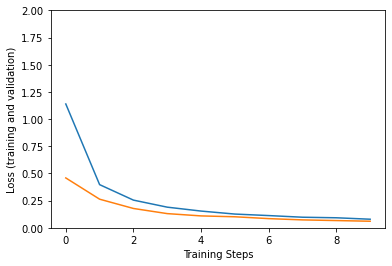

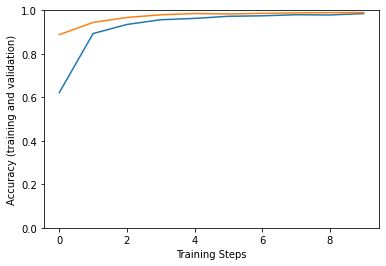

In [ ]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["acc"])
plt.plot(hist["val_acc"]) 

In [ ]:
PAKNOTE_SAVED_MODEL = "/content/drive/MyDrive/notedataset/Copy of currency.rar (Unzipped Files)/currency/saved_models/Paknotes"
tf.keras.experimental.export_saved_model(model, PAKNOTE_SAVED_MODEL)
Paknotes_model = tf.keras.experimental.load_from_saved_model(PAKNOTE_SAVED_MODEL,
custom_objects={'KerasLayer':hub.KerasLayer})

Instructions for updating:
Please use `model.save(..., save_format="tf")` or `tf.keras.models.save_model(..., save_format="tf")`.


Instructions for updating:
Please use `model.save(..., save_format="tf")` or `tf.keras.models.save_model(..., save_format="tf")`.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']


INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']


INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.


INFO:tensorflow:SavedModel written to: /content/drive/MyDrive/notedataset/Copy of currency.rar (Unzipped Files)/currency/saved_models/Paknotes/saved_model.pb


INFO:tensorflow:SavedModel written to: /content/drive/MyDrive/notedataset/Copy of currency.rar (Unzipped Files)/currency/saved_models/Paknotes/saved_model.pb


Instructions for updating:
The experimental save and load functions have been  deprecated. Please switch to `tf.keras.models.load_model`.


Instructions for updating:
The experimental save and load functions have been  deprecated. Please switch to `tf.keras.models.load_model`.


In [ ]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [ ]:
tf_model_predictions = Paknotes_model.predict(val_image_batch)
tf_pred_dataframe = pd.DataFrame(tf_model_predictions)
tf_pred_dataframe.columns = dataset_labels
print("Prediction results for the first elements")
tf_pred_dataframe.head()

Prediction results for the first elements


,1000_Rupee_Fake_Note,1000_Rupee_Real_Note,100_Rupee_Note,10_Rupee_Note,20_Rupee_Note,5000_Rupee_Fake_Note,5000_Rupee_Real_Note,500_Rupee_Note,50_Rupee_Note
0,0.98511654,0.00977459,0.00000039,0.00001425,0.00000049,0.00090274,0.00355349,0.00062847,0.00000908
1,0.99472553,0.00081486,0.00000421,0.00007561,0.00001452,0.00057210,0.00061283,0.00316014,0.00002014
2,0.98692650,0.00372653,0.00000232,0.00049815,0.00000265,0.00059836,0.00808115,0.00013043,0.00003380
3,0.00119325,0.01698504,0.06023564,0.04049911,0.00432105,0.00875429,0.84284490,0.01744536,0.00772144
4,0.00000682,0.00007514,0.00000086,0.99979204,0.00000095,0.00000360,0.00002326,0.00008838,0.00000889


In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]  

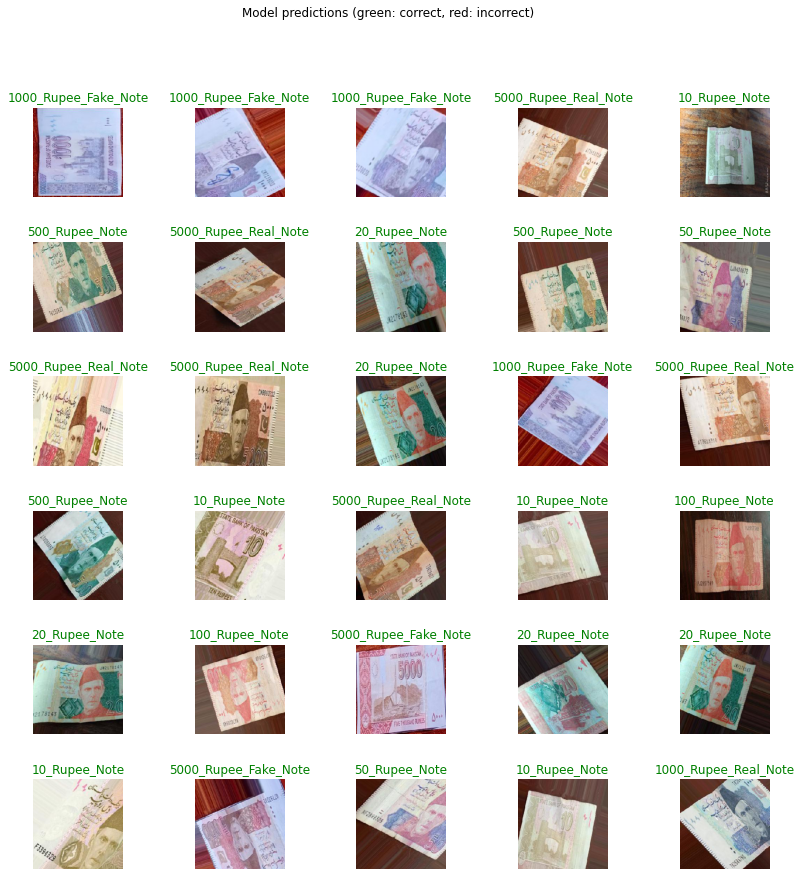

In [ ]:
plt.figure(figsize=(14,14))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [ ]:
TFLITE_MODEL = "/content/drive/MyDrive/notedataset/Copy of currency.rar (Unzipped Files)/currency/tflite_models/Paknotes.tflite"
TFLITE_QUANT_MODEL = "/content/drive/MyDrive/notedataset/Copy of currency.rar (Unzipped Files)/currency/tflite_models/Paknotes_quant.tflite"

In [ ]:
# Get the concrete function from the Keras model.
run_model = tf.function(lambda x : Paknotes_model(x))
# Save the concrete function.
concrete_func = run_model.get_concrete_function(
tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype)
)
# Convert the model
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converted_tflite_model = converter.convert()
open(TFLITE_MODEL, "wb").write(converted_tflite_model)
# Convert the model to quantized version with post-training quantization
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quant_model = converter.convert()
open(TFLITE_QUANT_MODEL, "wb").write(tflite_quant_model)
print("TFLite models and their sizes:")
!ls "/content/drive/MyDrive/notedataset/Copy of currency.rar (Unzipped Files)/currency/tflite_models" -lh

TFLite models and their sizes:
total 11M
-rw------- 1 root root 2.3M Jun 25 07:33 Paknotes_quant.tflite
-rw------- 1 root root 8.6M Jun 25 07:32 Paknotes.tflite
